# Title: Boosting sales margin of a product using data-driven price optimization for E-commerce platform

# Importing necessary libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn import metrics
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler as scale
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

For the purpose of analysing one real-world product data, we are using olist store dataset which is publicly available on kaggle.
Reference link: [click here](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce).

There are 8 datasets but we have merged the columns according to project requirement. Reference link: [click here](https://www.kaggle.com/datasets/gaurichaudhari9/olist-store-modified-dataset)



In [ ]:
# Loading dataset
orders = pd.read_csv("final_data.csv")

# Data Cleaning

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   customer_unique_id             115609 non-null  object 
 9   zip_code                       115609 non-null  int64  
 10  customer_city                  115609 non-null  object 
 11  customer_state                 115609 non-null  object 
 12  order_item_id                 

We have more than 100k sales records and 40 columns. 

For the purpose of this project,we will only try to boost sales of one product from a top selling category which we will frind from EDA in future steps.

Let's view and analyze the data on the statistical level:

In [ ]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,...,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,37.77,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23


## Do we have any incomplete records in the dataset?

In [ ]:
orders.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
customer_unique_id                    0
zip_code                              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
product_weight_g                      1
product_length_cm                     1
product_height_cm                     1


**Observation:**  9 colums seems to have incomplete records.

Since we don't want to deal with inconsistent data, let's drop all the incomplete records.

In [ ]:
orders = orders.drop(columns=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','review_comment_title','shipping_limit_date','review_comment_title','review_comment_message'],axis=1)

Renaming the 'product_category_name_english' column for better understanding


In [ ]:
orders.rename(columns={'product_category_name_english':'category'},inplace=True)

In [ ]:
orders.isna().sum()

order_id                      0
customer_id                   0
order_status                  0
order_purchase_timestamp      0
customer_unique_id            0
zip_code                      0
customer_city                 0
customer_state                0
order_item_id                 0
product_id                    0
seller_id                     0
price                         0
freight_value                 0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
category                      0
payment_sequential            0
payment_type                  0
payment_installments          0
payment_value                 0
seller_zip_code_prefix        0
seller_city                   0
seller_state                  0
review_id                     0
review_score                  0
review_c

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    115609 non-null  object 
 1   customer_id                 115609 non-null  object 
 2   order_status                115609 non-null  object 
 3   order_purchase_timestamp    115609 non-null  object 
 4   customer_unique_id          115609 non-null  object 
 5   zip_code                    115609 non-null  int64  
 6   customer_city               115609 non-null  object 
 7   customer_state              115609 non-null  object 
 8   order_item_id               115609 non-null  int64  
 9   product_id                  115609 non-null  object 
 10  seller_id                   115609 non-null  object 
 11  price                       115609 non-null  float64
 12  freight_value               115609 non-null  float64
 13  product_catego

## Do we have any duplicate records in the data?

In [ ]:
orders.duplicated().sum()

0

**Observations:** We don't observe any duplicate records

After performing data cleaning, it seems like the data is ready to use.

# Data Pre-processing

What are the different status of orders present in dataset?

In [ ]:
orders['order_status'].unique()

array(['delivered', 'shipped', 'invoiced', 'processing', 'canceled',
       'approved', 'unavailable'], dtype=object)

In [ ]:
orders['order_status'].value_counts()

delivered      113210
shipped          1138
canceled          536
invoiced          358
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64

**Observations:** It looks like there are 7 statuses. In this project, we are only dealing with closed deals for simplicity so we will only considered delivered orders from this dataset

In [ ]:
orders = orders[(orders.order_status == 'delivered')]

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113210 entries, 0 to 115608
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    113210 non-null  object 
 1   customer_id                 113210 non-null  object 
 2   order_status                113210 non-null  object 
 3   order_purchase_timestamp    113210 non-null  object 
 4   customer_unique_id          113210 non-null  object 
 5   zip_code                    113210 non-null  int64  
 6   customer_city               113210 non-null  object 
 7   customer_state              113210 non-null  object 
 8   order_item_id               113210 non-null  int64  
 9   product_id                  113210 non-null  object 
 10  seller_id                   113210 non-null  object 
 11  price                       113210 non-null  float64
 12  freight_value               113210 non-null  float64
 13  product_catego

Since the order_purchase_timestamp is of object type, we are changing its type to datetime for future computations.

In [ ]:
# Changing timestamp type from object to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.date
orders['order_purchase_timestamp'] =  pd.to_datetime(orders['order_purchase_timestamp'])


Extracting year, month, year_month from the timestamp. Additionally adding order count column for total sales calculation

In [ ]:
orders['year'] = orders.order_purchase_timestamp.apply(lambda x: x.year)
orders['month'] = orders.order_purchase_timestamp.apply(lambda x: x.month)
orders['year_month'] = orders['order_purchase_timestamp'].dt.strftime('%Y-%m')
orders['order_count']=1

# Feature Selection

Do we need all features for our optimizer modeling?

In [ ]:
orders.columns.size

44

In [ ]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'zip_code', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'category',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'year', 'month', 'year_month',
       'order_count'],
      dtype='object')

**Observation 1:** We have 44 columns but do we require all 44 columns to predict a price that would increase sales?

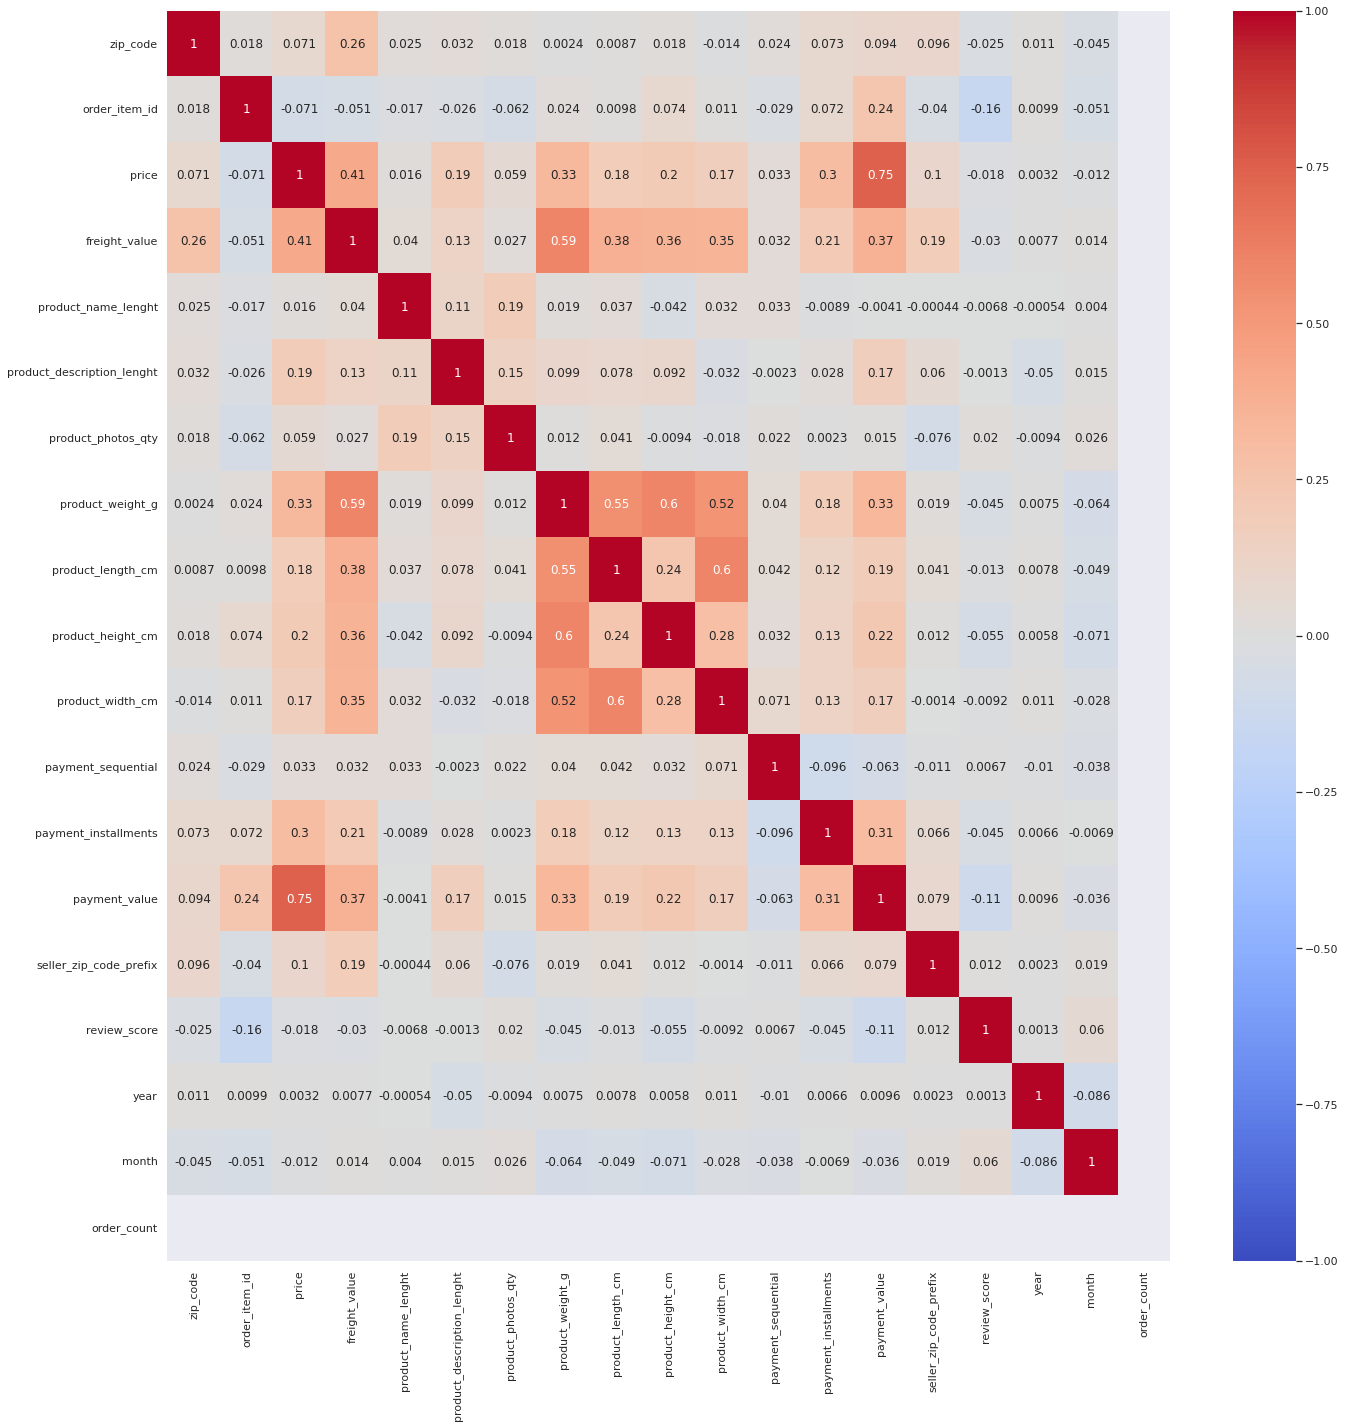

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(orders.corr(),vmin=-1,cmap='coolwarm',annot=True)

Not all the columns have a correlation so not all columns are required to be fed to the optimizer. We can exclude few features.

Dropping timestamp based columns,reviews(as we are not dealing with NLP) and original product category name

In [ ]:
orders = orders.drop(['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','review_comment_message','shipping_limit_date','product_category_name','review_comment_title','review_answer_timestamp','review_creation_date'],axis=1)

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 128 to 115608
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    11578 non-null  object 
 1   customer_id                 11578 non-null  object 
 2   order_status                11578 non-null  object 
 3   customer_unique_id          11578 non-null  object 
 4   zip_code                    11578 non-null  int64  
 5   customer_city               11578 non-null  object 
 6   customer_state              11578 non-null  object 
 7   order_item_id               11578 non-null  int64  
 8   product_id                  11578 non-null  object 
 9   seller_id                   11578 non-null  object 
 10  price                       11578 non-null  float64
 11  freight_value               11578 non-null  float64
 12  product_name_lenght         11578 non-null  int64  
 13  product_description_lenght  

# Dimensionality Reduction



For the sake of performing PCA, we are dropping id based columns as they are alphanumeric

In [ ]:
orders_pca = orders.drop(columns=['order_id','customer_id','review_id','order_item_id','seller_id','customer_unique_id','product_id','order_status','year_month'],axis=1)
orders_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 128 to 115608
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zip_code                    11578 non-null  int64  
 1   customer_city               11578 non-null  object 
 2   customer_state              11578 non-null  object 
 3   price                       11578 non-null  float64
 4   freight_value               11578 non-null  float64
 5   product_name_lenght         11578 non-null  int64  
 6   product_description_lenght  11578 non-null  int64  
 7   product_photos_qty          11578 non-null  int64  
 8   product_weight_g            11578 non-null  float64
 9   product_length_cm           11578 non-null  float64
 10  product_height_cm           11578 non-null  float64
 11  product_width_cm            11578 non-null  float64
 12  category                    11578 non-null  object 
 13  payment_sequential          

Applying Label Encoding to Categorical attributes

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
orders_pca['customer_city']= label_encoder.fit_transform(orders_pca['customer_city'])
orders_pca['customer_state']= label_encoder.fit_transform(orders_pca['customer_state'])
orders_pca['seller_city']= label_encoder.fit_transform(orders_pca['seller_city'])
orders_pca['seller_state']= label_encoder.fit_transform(orders_pca['seller_state'])
orders_pca['payment_type']= label_encoder.fit_transform(orders_pca['payment_type'])
orders_pca['category'] = label_encoder.fit_transform(orders_pca['category'])
orders_pca

,zip_code,customer_city,customer_state,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,...,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_score,year,month,order_count
128,13481,799,25,17.37,7.39,60,817,1,50.0,16.0,...,1,1,24.76,2030,315,17,4,2018,6,1
177,97590,1221,22,5.90,18.23,41,400,1,350.0,16.0,...,0,1,144.78,2030,315,17,1,2018,7,1
178,97590,1221,22,5.90,18.23,41,400,1,350.0,16.0,...,0,1,144.78,2030,315,17,1,2018,7,1
179,97590,1221,22,5.90,18.23,41,400,1,350.0,16.0,...,0,1,144.78,2030,315,17,1,2018,7,1
180,97590,1221,22,5.90,18.23,41,400,1,350.0,16.0,...,0,1,144.78,2030,315,17,1,2018,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115590,18047,1436,25,18.99,7.39,53,80,1,250.0,32.0,...,1,1,26.38,5201,315,17,5,2018,5,1
115591,3574,1374,25,18.99,7.39,53,80,1,250.0,32.0,...,1,1,26.38,5201,315,17,4,2018,4,1
115604,88350,211,23,289.49,24.83,47,1002,3,1900.0,19.0,...,1,5,314.32,95910,174,15,5,2018,8,1
115607,9951,449,25,19.00,12.86,32,660,3,500.0,16.0,...,1,1,84.63,17201,165,17,3,2018,7,1


### Feature scaling

In [ ]:
scaler = scale()
scaler.fit(orders_pca)
scaled_data = scaler.transform(orders_pca)

([<matplotlib.axis.XTick at 0x7f1f3470eac0>,
 <a list of 24 Text major ticklabel objects>)

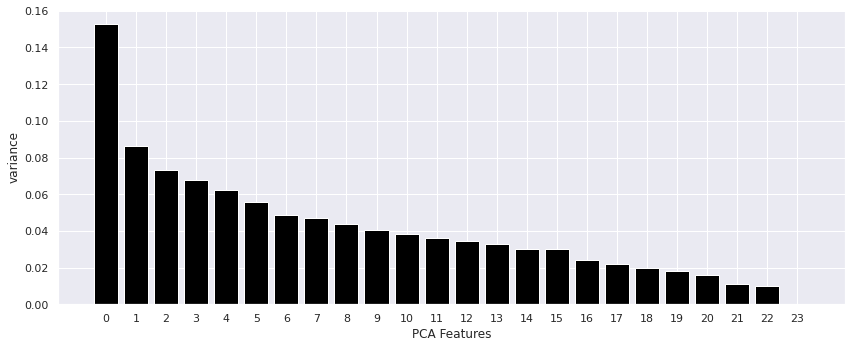

In [ ]:
pca = PCA(n_components=24) 
principalComponents = pca.fit_transform(scaled_data)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color = "black")
plt.xlabel("PCA Features")
plt.ylabel("variance")
plt.xticks(features)

In [ ]:
print(f'scaled transformed:\n{principalComponents}')

scaled transformed:
[[-1.78915648 -0.9915772   0.50575118 ... -0.44939969  0.07284326
  -0.        ]
 [-1.29130725  0.1445215   1.4490181  ... -0.16043196 -0.06483136
   0.        ]
 [-1.29130725  0.1445215   1.4490181  ... -0.16043196 -0.06483136
   0.        ]
 ...
 [ 0.74134337  2.57629743 -0.58086013 ...  0.46497455 -0.44635816
   0.        ]
 [-1.69398342 -0.1945956  -0.69429724 ...  0.31200652  0.08429204
  -0.        ]
 [-1.45454791 -0.2238317  -0.17733502 ...  0.17962967  0.08459756
  -0.        ]]


In [ ]:
print(f'Eigenvalues: \n{pca.explained_variance_}')

Eigenvalues: 
[3.51935228 1.98088086 1.67946373 1.55547842 1.42841886 1.27674909
 1.11870001 1.08060292 1.00973884 0.93066439 0.88270347 0.82969318
 0.79960423 0.75008807 0.69775192 0.6880032  0.5592638  0.50074465
 0.45251188 0.41167427 0.37122486 0.24885426 0.22981949 0.        ]


In [ ]:
print(f'Eigenvectors: \n{pca.components_}')

Eigenvectors: 
[[ 1.07283581e-01 -5.83211233e-02 -8.75066915e-02  3.42131017e-01
   4.09440942e-01  2.31132297e-02  1.18262007e-01  1.79369185e-02
   4.23694074e-01  3.30424817e-01  3.03938820e-01  3.18123872e-01
  -3.43433723e-02  2.28480604e-02  1.84135184e-02  2.07692351e-01
   3.38854409e-01  1.13238335e-01 -9.88447581e-02 -9.76218285e-02
  -4.53598384e-02  7.00981683e-03 -3.72342651e-02  0.00000000e+00]
 [ 3.88724290e-01 -2.99029131e-01 -3.74951196e-01  7.06538891e-02
   8.96661546e-02 -2.89583636e-03  9.84516718e-02 -2.82069638e-02
  -2.18054651e-01 -2.26755306e-01 -1.62170931e-01 -2.62919569e-01
   4.58308090e-02 -6.41342164e-02 -3.71843899e-02  6.31367801e-02
   5.75518287e-02  3.97308410e-01 -2.31334547e-01 -4.16967816e-01
   7.89442092e-04 -1.00150321e-02  2.71738751e-02 -0.00000000e+00]
 [ 2.90394237e-01 -1.90481049e-01 -2.89987069e-01  1.80062990e-01
   4.76735845e-02  7.39414135e-02  9.22006496e-02  2.42149771e-01
  -5.30302181e-02 -1.38539713e-01 -1.23847001e-02 -1.660729

We plotted variance graph for all 24 features.
Now, we take some number of components and plot graph of its variance percentage.

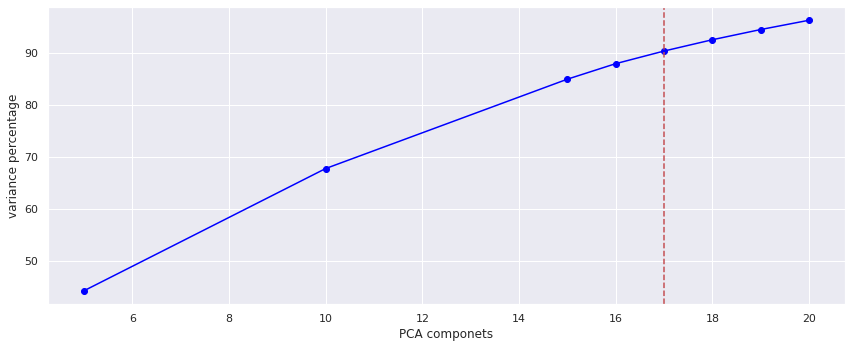

In [ ]:
components =[5,10,15,16,17,18,19,20]
variance_percent=[]
for i in components:
  pca= PCA(i)
  PrincipalComponents_ = pca.fit_transform(scaled_data)
  var_ratio = pca.explained_variance_ratio_
  variance_percent.append(sum(var_ratio)*100)

plt.plot(components,variance_percent,color='blue', marker='o')
plt.axvline(17, color='r', linestyle='dashed')
plt.xlabel("PCA componets")
plt.ylabel("variance percentage")
plt.show()
# df_pc = pd.DataFrame(PrincipalComponents_,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11","PCA12","PCA13","PCA14","PCA15","PCA16"])

We see, when number of components is 16, variance percentage is 91. Hence, we can reduce number of features to 16



In [ ]:
pca= PCA(17)
PrincipalComponents_ = pca.fit_transform(scaled_data)
df_pc = pd.DataFrame(PrincipalComponents_,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11","PCA12","PCA13","PCA14","PCA15","PCA16","PCA17"])
df_pc.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17
0,-1.789156,-0.991577,0.505751,-0.218450,0.293792,-0.154203,0.301297,-0.542795,0.353870,0.304042,-0.240973,-0.764370,-1.565101,0.649536,-0.829681,-0.004337,-0.141422
1,-1.291307,0.144521,1.449018,-0.365807,-1.501985,0.931064,0.597494,-0.346621,1.478661,-0.238831,-1.682608,0.868156,-0.508295,-0.147700,-0.041574,0.354897,1.823573
2,-1.291307,0.144521,1.449018,-0.365807,-1.501985,0.931064,0.597494,-0.346621,1.478661,-0.238831,-1.682608,0.868156,-0.508295,-0.147700,-0.041574,0.354897,1.823573
3,-1.291307,0.144521,1.449018,-0.365807,-1.501985,0.931064,0.597494,-0.346621,1.478661,-0.238831,-1.682608,0.868156,-0.508295,-0.147700,-0.041574,0.354897,1.823573
4,-1.291307,0.144521,1.449018,-0.365807,-1.501985,0.931064,0.597494,-0.346621,1.478661,-0.238831,-1.682608,0.868156,-0.508295,-0.147700,-0.041574,0.354897,1.823573


In [ ]:
var_ratio = pca.explained_variance_ratio_
print(f'total variance for 17 components:{sum(var_ratio)*100}')

total variance for 17 components:90.37113861630736


# Exploratory Data Analysis

How many categories does the data have?

In [ ]:
# Unique categories
categories = orders['category'].unique()
len(categories)

71

**Observations:** There are 71 unique categories

In [ ]:
categories

array(['housewares', 'bed_bath_table', 'health_beauty', 'auto',
       'construction_tools_construction', 'stationery', 'furniture_decor',
       'office_furniture', 'garden_tools', 'computers_accessories',
       'cool_stuff', 'sports_leisure', 'food', 'musical_instruments',
       'construction_tools_lights', 'industry_commerce_and_business',
       'kitchen_dining_laundry_garden_furniture', 'art',
       'costruction_tools_tools', 'toys', 'fashion_underwear_beach',
       'market_place', 'perfumery', 'home_construction', 'pet_shop',
       'home_appliances', 'baby', 'furniture_living_room', 'telephony',
       'fashion_bags_accessories', 'electronics', 'luggage_accessories',
       'watches_gifts', 'small_appliances', 'computers', 'music',
       'party_supplies', 'fashion_childrens_clothes', 'furniture_bedroom',
       'audio', 'signaling_and_security', 'agro_industry_and_commerce',
       'fixed_telephony', 'consoles_games', 'cine_photo',
       'construction_tools_safety', 'books

### How is the trend of sales with passing months?

In [ ]:
orderSales = orders.groupby(['year', 'month','year_month'], as_index=False).sum().loc[:, ['year', 'month','year_month', 'price','order_count']]
orderSales
# From the results we can see gradually the order_counts increase with passing months

,year,month,year_month,price,order_count
0,2016,10,2016-10,41043.73,328
1,2016,12,2016-12,10.90,1
2,2017,1,2017-01,118525.81,958
3,2017,2,2017-02,236110.95,1902
4,2017,3,2017-03,370039.64,3010
5,2017,4,2017-04,349595.61,2622
6,2017,5,2017-05,516270.99,4174
7,2017,6,2017-06,437773.82,3639
8,2017,7,2017-07,510081.68,4666
9,2017,8,2017-08,572738.71,4973


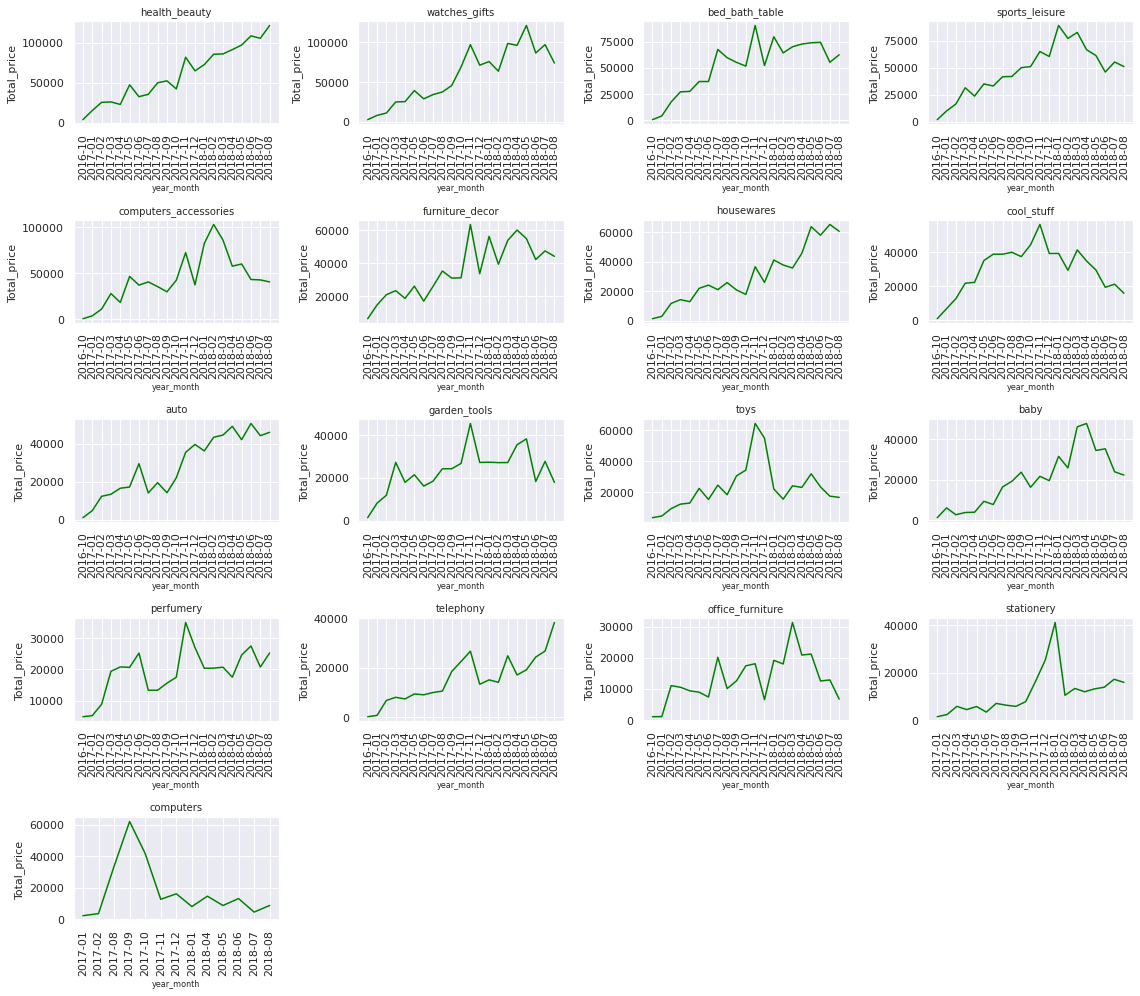

In [ ]:
# Reference: https://medium.com/hamoye-blogs/unraveling-brazilian-e-commerce-dataset-e78463d77340
top_cat = orders.groupby(["category"]).sum().sort_values("price", ascending=False).reset_index()
top_category = top_cat['category'].head(17).to_list()

category_graph = orders.groupby(['category', 'year_month'])['price'].sum().reset_index()
fig = plt.figure(figsize = (16, 14))
fig.subplots_adjust(hspace=1.2, wspace=0.5)
for i, cat in enumerate(top_category):
    ax = plt.subplot(5, 4, i+1)
    data = category_graph[category_graph['category']== cat]
    sns.lineplot(data['year_month'], data['price'], ax=ax, color='green')
    plt.xticks(rotation=90)
    plt.title(cat, fontsize= 10)
    plt.xlabel('year_month', fontsize=8)
    plt.ylabel('Total_price', fontsize=11)

## Which categories generated most revenues in the year 2018?

A good way to find top selling products is analyzing latest year's available data to determine which categories are responsible and contributing to most of the revenues of the company.

In [ ]:
orders_2018 = orders.loc[orders['year']==2018]

There are 61680 records in 2018

In [ ]:
revenue_2018 = orders_2018.groupby(["category"]).agg({'price':'sum'}).rename(columns={'price':'revenue'}).reset_index()
revenue_2018 = revenue_2018.sort_values(by=['revenue'], ascending=False)
revenue_2018.head()

,category,revenue
43,health_beauty,768757.83
69,watches_gifts,712538.50
7,bed_bath_table,553929.63
64,sports_leisure,528282.56
15,computers_accessories,516811.72


In [ ]:
category = revenue_2018['category'].to_list()
revenue = revenue_2018['revenue'].to_list()

['health_beauty',
 'watches_gifts',
 'bed_bath_table',
 'sports_leisure',
 'computers_accessories',
 'housewares',
 'furniture_decor',
 'auto',
 'baby',
 'cool_stuff',
 'garden_tools',
 'telephony',
 'perfumery',
 'toys',
 'office_furniture',
 'stationery',
 'pet_shop',
 'construction_tools_construction']

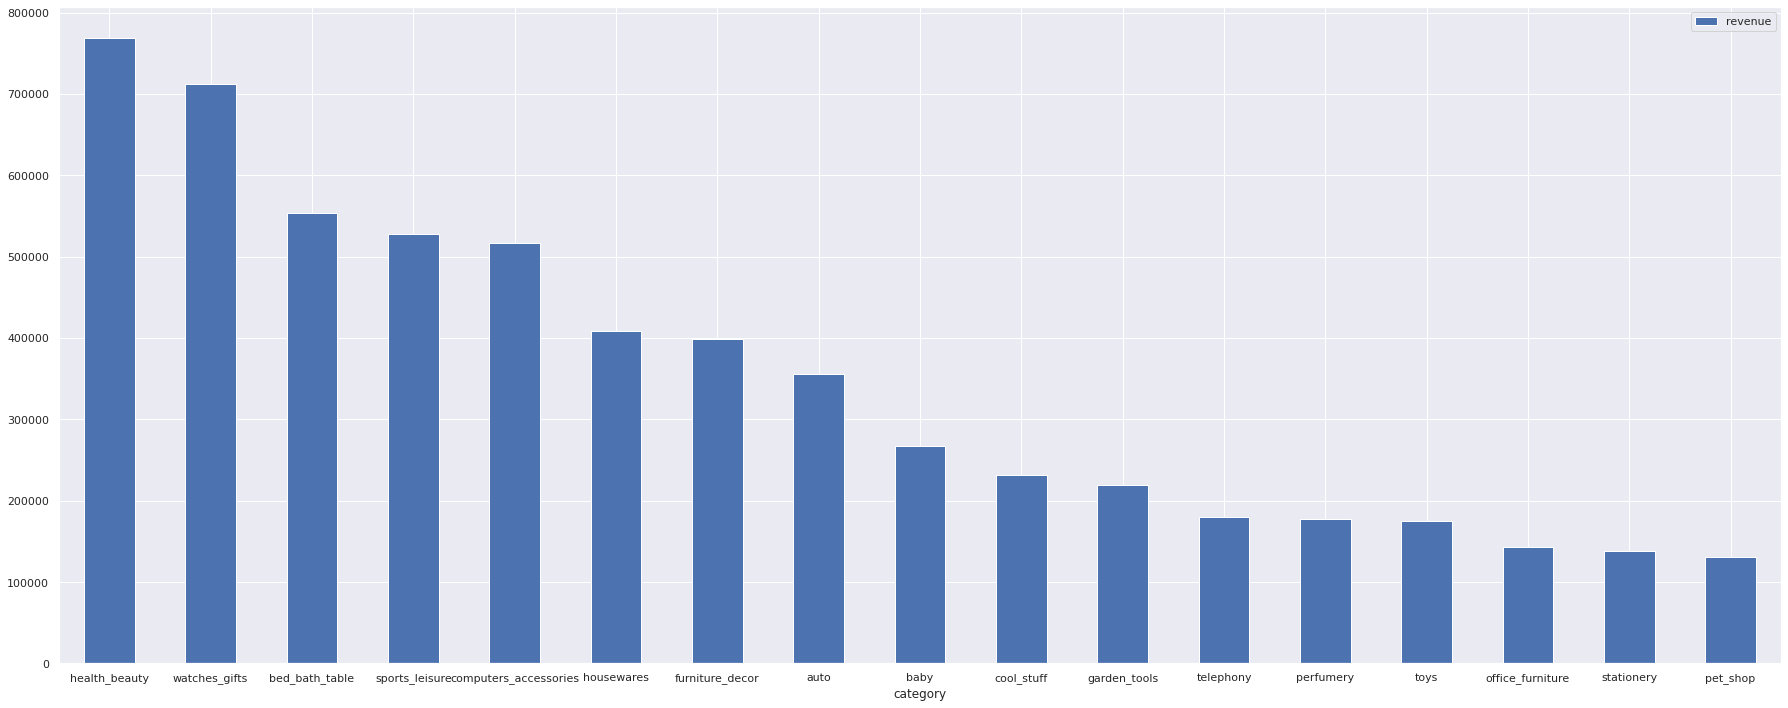

In [ ]:
ax= revenue_2018.iloc[:17,:].plot.bar('category','revenue',rot=0,figsize=(25,10))

**Observations:**  health_beaty department has generated a revenue of $768757.83 in the year 2018 and is the top selling category among the entire olist store.

In [ ]:
revenue_2018['revenue'].sum()

7389947.5200000005

Total revenue generated by olist store in 2018: $ 7389947.52

### How much do the top 17 categories contribute to the total revenue?

In [ ]:
revenue_2018['revenue'].head(17).sum() #Total revenue generated by top 17 categories

5905145.5600000005

In [ ]:
revenue_2018['revenue'].head(20)

43    768757.83
69    712538.50
7     553929.63
64    528282.56
15    516811.72
49    408959.27
39    398837.15
5     355330.67
6     266723.02
20    232030.11
42    219565.02
67    179981.05
59    177141.42
68    174842.28
57    142779.67
65    137862.38
60    130773.28
17    125107.20
56    111078.95
26     99160.51
Name: revenue, dtype: float64

**Observation:** From above two codes we can conclude that the top 17 out of the 71 selling categories contribute to almost 80% of the total revenue.

# Is there any effect on the sales based on particular days?

In [ ]:
# Reference: https://medium.com/hamoye-blogs/unraveling-brazilian-e-commerce-dataset-e78463d77340

In [ ]:
successful_orders_sales = orders.groupby(['year', 'month','year_month'], as_index=False).sum().loc[:, ['year', 'month','year_month', 'price','order_count']]

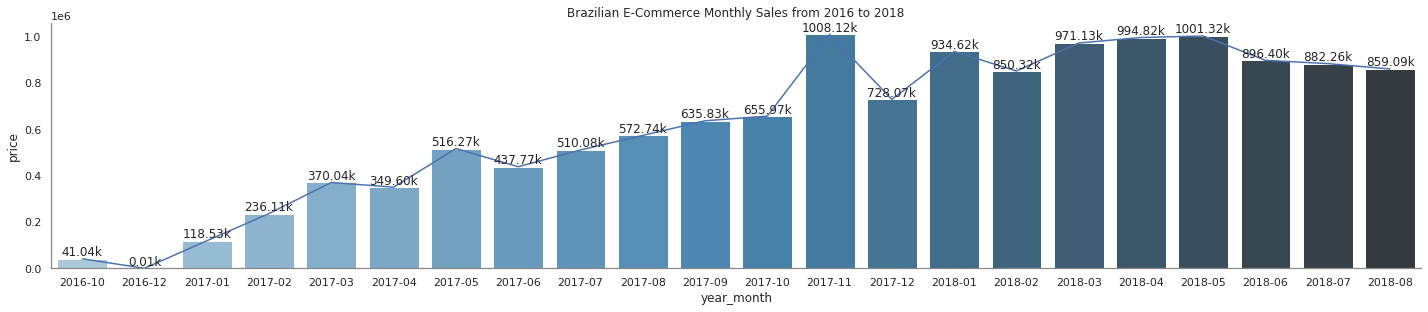

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

def bar_plot(x, y, df, colors='Blues_d', hue=False, ax=None, value=False, title=''):
    
    # Preparing variables
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    #fig, ax = plt.subplots()
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Setting borders
    format_spines(ax)

    # Setting percentage
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[x].describe().name + ' Analysis', size=12, pad=15)
    else:
        ax.set_title(df[x].describe().name + ' Analysis by ' + hue, size=12, pad=15)
    if title != '':
        ax.set_title(title)  
    plt.tight_layout()

def format_spines(ax, right_border=True):
    
    ax.spines['bottom'].set_color('#888888')
    ax.spines['left'].set_color('#888888')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#FFFFFF')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

fig, ax = plt.subplots(figsize=(20, 4.5))
ax = sns.lineplot(x='year_month', y='price', data=successful_orders_sales)
bar_plot(x='year_month', y='price', df=successful_orders_sales, value=True)
format_spines(ax, right_border=False)
ax.set_title('Brazilian E-Commerce Monthly Sales from 2016 to 2018');

Observations: 27-11 which also happens to be black friday has the most number of sales. There is a possibility that the sellers had given out a lot of discounts and promotional offers on this day which resulted in more sales. 

# Considering health_beauty category which generated the most sales in 2018

In [ ]:
orders_health_beauty = orders.loc[orders['category']=='health_beauty']
orders_health_beauty

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,zip_code,customer_city,customer_state,order_item_id,product_id,...,seller_city,seller_state,review_id,review_score,review_creation_date,review_answer_timestamp,year,month,year_month,order_count
455,04cc9ab9d21b11d7aca691cf7facaaa1,16fea2cb1931a45f2a7c8d178afb1c83,delivered,2018-04-30,0e201fc3c7b9b02edb2d1a6e7f188912,3047,sao paulo,SP,2,2948658cb6abc82847412be7201bfc4c,...,sao paulo,SP,4752f49c65f0e85be766def8840a0d00,4,2018-05-05 00:00:00,2018-05-07 18:37:21,2018,4,2018-04,1
1300,ca290a06ee0945b956f79c93b5191633,acd575d7382968889f41a5a3f37510dd,delivered,2018-04-09,323c4e9d78f774df9255793377ce636e,77645,lajeado,TO,1,2948658cb6abc82847412be7201bfc4c,...,sao paulo,SP,8f17f539b9a0564eaf31899dbc8d9775,4,2018-04-26 00:00:00,2018-04-26 19:50:48,2018,4,2018-04,1
1301,61898b3ad4d51459e014bc6d4c2e7166,a9b67ff10261665661f54c364e82d9b2,delivered,2018-06-10,05bc8e1bebeff93bdf784213a7aed5d7,17022,bauru,SP,1,2948658cb6abc82847412be7201bfc4c,...,sao paulo,SP,25f33727efe9832e753a23b0ece70157,5,2018-06-16 00:00:00,2018-06-18 11:13:48,2018,6,2018-06,1
1302,6b9ac2a31d647731d9523ae035f17dbc,b25d246218db68891876e79b3476038f,delivered,2018-04-26,66a2199c05159203014883cc0d3cf33f,54762,camaragibe,PE,1,2948658cb6abc82847412be7201bfc4c,...,sao paulo,SP,984710cdfba2b948e05c7004c0a7f36f,4,2018-05-25 00:00:00,2018-05-25 22:25:26,2018,4,2018-04,1
1304,acf579dc44e10bf23cabf01d80f9f62c,527b26bd8ea58b018efd96060cac5ccb,delivered,2018-04-05,1b0843d4f653e7301b596757fed2179d,45680,urucuca,BA,1,2948658cb6abc82847412be7201bfc4c,...,sao paulo,SP,c0404b666de439a078be8897dd70d7d4,4,2018-04-28 00:00:00,2018-04-28 22:17:14,2018,4,2018-04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108072,e82787bc54afe9f580cbec98c3af178a,b30eac48437e2422a2530a87568b5613,delivered,2017-06-01,4f7d260b5caf79ba4cab37d9acb80f19,62640,pentecoste,CE,1,5f537918a8fcb8d675c944266babf1d6,...,lencois paulista,SP,043f535cf817cb6248ec3edac454e20e,4,2017-06-14 00:00:00,2017-06-15 03:04:17,2017,6,2017-06,1
108073,21dcd7ede33a335560d594e78f70499b,83829af919c82f52ae2a979182c900db,delivered,2018-04-24,41f28f024fc040a000297f55bd8c985a,17602,tupa,SP,1,152eb960a9b1698e3b8dcd50aa14b611,...,franca,SP,0425ce837817cd89c2bc5e6f005e9d8f,5,2018-05-03 00:00:00,2018-05-03 14:29:09,2018,4,2018-04,1
108077,a6c258c89be1621b6e7c2bd85b4c866d,669a87ed9830ed7d79b3a22210a1a52d,delivered,2018-04-26,29eb806efe56d9cb4c9532edcc33ef15,13974,itapira,SP,1,5a68d72870a735b2e7ec0277013f7aa6,...,sao paulo,SP,e59d582477716880d74d630e2e0fc6cb,4,2018-05-09 00:00:00,2018-05-10 10:36:39,2018,4,2018-04,1
108078,80ba449ea98f8e879a829759b5a66294,0e07a801a6729369c02b88f4d38388cb,delivered,2018-02-25,34f2ec40e13a7f433b8ef0aa77426e77,72813,luziania,GO,1,cec29a60285cd686caa31318b3ad3671,...,curitiba,PR,4c3a0a71949616a4e151dc0b6cf46813,5,2018-03-13 00:00:00,2018-03-13 20:53:09,2018,2,2018-02,1


This dataset does not have names of products, so we will deal with product_ids on macro-level

## Most sold out product from health_beauty category

In [ ]:
orders_health_beauty.groupby('product_id').size().sort_values(ascending=False) #Most sold product

product_id
154e7e31ebfa092203795c972e5804a6    286
2b4609f8948be18874494203496bc318    269
7c1bd920dbdf22470b68bde975dd3ccf    230
bb50f2e236e5eea0100680137654686c    209
6cdd53843498f92890544667809f1595    155
                                   ... 
6f636bbfc940a89b20858b9080f4c091      1
6f560724f3fa3fdb4940c4fd4996a359      1
6f3aab861391bdb91a3899c05faac2c0      1
6f2a4da2fb20abf7cfb17f4ccdba0fdb      1
fff81cc3158d2725c0655ab9ba0f712c      1
Length: 2390, dtype: int64

## Which product from health_beauty has undergone the most price changes in 2018?

In [ ]:
# Which product has the most pricing variating in health and beauty?

orders_health_beauty = orders.loc[orders['category']=='health_beauty'].sort_values('product_id',ascending=False)
top_price_variation_product = orders_health_beauty.groupby('product_id').agg({'price':pd.Series.nunique})
top_price_variation_product.sort_values('price',ascending=False)

,price
product_id,
437c05a395e9e47f9762e677a7068ce7,31
921d31a1daa51460b7a95ea5f3ab64d5,13
8c292ca193d326152e335d77176746f0,9
af0a99476d96dcc1a1baa7c0d9ff6b9d,8
2fea0f2cec6b6324a277d4a61c2ed2c6,8
...,...
60c031bf1162848b7ee14f56f432285b,1
609c35bf8122d5ab8186ed7a6bfcd843,1
608f44934fbb70de5e05998ae59f4e46,1


**Observations:** The product "437c05a395e9e47f9762e677a7068ce7" has undergone price variation of 31 times so we'll work on it and find which price will be fit for next year

In [ ]:
product_1 = orders_health_beauty.loc[orders_health_beauty['product_id']=='437c05a395e9e47f9762e677a7068ce7']

## Calculating revenue of this product in the year 2018

In [ ]:
product_1['price'].mean()

50.0378947368421

In [ ]:
product_1['price'].count()

152

**Observation:** Last year, this product was sold for an average of $50.03789 and 152 units were sold

In [ ]:
revenue_of_product_2018 = product_1.groupby(['year']).agg({'price':"mean",'product_id':"count"})
revenue_of_product_2018 = revenue_of_product_2018.rename(columns={'product_id':'units_sold'})
revenue_of_product_2018

,price,units_sold
year,,
2018,50.037895,152


# Modeling

## Linear

In [ ]:
# X = product_1.drop(,axis=1)
X = product_1.iloc[: , 10:]
X = X.drop(['seller_id','product_category_name','price','category','payment_type','seller_zip_code_prefix','seller_city','review_id','seller_state','review_creation_date','review_answer_timestamp','year_month'],axis=1)
y = product_1['price']

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 52503 to 48148
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   freight_value               152 non-null    float64
 1   product_name_lenght         152 non-null    int64  
 2   product_description_lenght  152 non-null    int64  
 3   product_photos_qty          152 non-null    int64  
 4   product_weight_g            152 non-null    float64
 5   product_length_cm           152 non-null    float64
 6   product_height_cm           152 non-null    float64
 7   product_width_cm            152 non-null    float64
 8   payment_sequential          152 non-null    int64  
 9   payment_installments        152 non-null    int64  
 10  payment_value               152 non-null    float64
 11  review_score                152 non-null    int64  
 12  year                        152 non-null    int64  
 13  month                       1

In [ ]:
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (152, 15)
Shape of y is:  (152,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
mse=metrics.mean_squared_error(pred, y_test)
print("RMSE: ", (sqrt(mse)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

RMSE:  2.793661844631041
R2 score:  -6.389940229480358


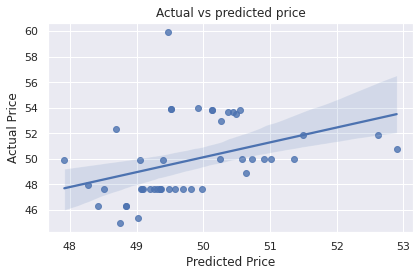

In [ ]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

## Ridge

In [ ]:
feature_count=17
ridge =Ridge()
alphas =  {'alpha':[0.0001,0.001,0.01,0.1,1, 10]}
ridge_model= GridSearchCV(ridge, alphas, scoring='neg_mean_squared_error',cv=feature_count)

In [ ]:
ridge_model.fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
error = sqrt(mean_squared_error(y_test, y_pred))
print("Ridge regression mse:{}".format(error))
print("Best alpha value: ",ridge_model.best_params_)
best_ridge_model=ridge_model.best_estimator_


Ridge regression mse:2.795574928396434
Best alpha value:  {'alpha': 10}


## Lasso

In [ ]:
feature_count=17
lasso =Lasso()
alphas =  {'alpha':[0.00000001,0.0000001, 0.0000001,0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,110]}
lasso_model= GridSearchCV(lasso, alphas, scoring='neg_mean_squared_error',cv=feature_count)
    

In [ ]:
lasso_model.fit(X_train,y_train)
y_pred = lasso_model.predict(X_test)
error = sqrt(mean_squared_error(y_test, y_pred))
print("Lasso regression mse:{}".format(error))
print("Best alpha value: ",lasso_model.best_params_)
best_lasso_model=lasso_model.best_estimator_

Lasso regression mse:2.73726615958083
Best alpha value:  {'alpha': 0.1}


# Demand curve

In [ ]:
product_1

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,zip_code,customer_city,customer_state,order_item_id,product_id,...,seller_city,seller_state,review_id,review_score,review_creation_date,review_answer_timestamp,year,month,year_month,order_count
52503,03af60619b8abd880dd136ed837be800,a93bacd3a4ee650966803e7bbe89bc33,delivered,2018-03-19,174fbc0ca39715c4d36463f56af17b3c,26290,nova iguacu,RJ,1,437c05a395e9e47f9762e677a7068ce7,...,sao paulo,SP,f1aadf4294fbbc13dd2453241041e574,1,2018-04-08 00:00:00,2018-04-08 04:16:35,2018,3,2018-03,1
52504,471af150dabb3b168af660f139fe01db,0cc966a6d82b632386cec199fba352a2,delivered,2018-02-24,6a76d73b5b2832fc05736775f2369bd5,1401,sao paulo,SP,1,437c05a395e9e47f9762e677a7068ce7,...,sao paulo,SP,076dca1f7483ab1f3628f7a7918313a9,5,2018-03-03 00:00:00,2018-03-06 07:46:09,2018,2,2018-02,1
52505,e96a4c3bfb4afc0cb895a76f5ba0440b,09241c552e9fe2420997a6c535e9d408,delivered,2018-04-15,44e9a1246448bd68a2e3bf0f1966c57a,4537,sao paulo,SP,1,437c05a395e9e47f9762e677a7068ce7,...,sao paulo,SP,23a1b92553d61a6bb3fa11433439b563,5,2018-04-21 00:00:00,2018-04-22 00:16:26,2018,4,2018-04,1
52506,c9d0741a7a1372f85dc44e9b73835240,424f86625efe107e467c2b741a786697,delivered,2018-04-23,0862d2d2c784b1b880b1848e10495b67,55150,belo jardim,PE,1,437c05a395e9e47f9762e677a7068ce7,...,sao paulo,SP,18b61a9cf3a82600b8f8ca57087d8a0f,3,2018-05-19 00:00:00,2018-05-20 11:18:48,2018,4,2018-04,1
52507,94988f535f661bb99df19830f8b0c85a,575c83fdc47cd734f5bcb15356b95284,delivered,2018-04-15,3442337a73c2faa75a6aa7ebcaa7a5a8,13211,jundiai,SP,1,437c05a395e9e47f9762e677a7068ce7,...,sao paulo,SP,312e6a6bf10cef05441bfc8acd0ca07f,3,2018-04-25 00:00:00,2018-04-26 16:15:48,2018,4,2018-04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48187,182680afbd9247820be311a34cafb4e9,4e59370bc614afb54393c2f03dda271d,delivered,2018-03-01,5aeb954efaab26e8df9dc937c322cbbd,12230,sao jose dos campos,SP,1,437c05a395e9e47f9762e677a7068ce7,...,indaiatuba,SP,31c4998921d34be6dea8dbb2aac4e4fa,4,2018-03-06 00:00:00,2018-03-07 11:10:18,2018,3,2018-03,1
48188,9710f69b6b9cfc910ad851334d8ba458,2caf8c04235c6582bab2c3960200bdaa,delivered,2018-03-21,b1f44bd81db24a10696e668dd607237c,45860,canavieiras,BA,1,437c05a395e9e47f9762e677a7068ce7,...,indaiatuba,SP,4693ff4f13c2c1e27371995670ab75e2,5,2018-04-11 00:00:00,2018-04-11 16:38:21,2018,3,2018-03,1
48171,c8ade02b622c1316fc0d05a427492f9c,59d07f9813c38cfee8291278d93831ff,delivered,2018-03-22,22d25d2c2d5870dca824f5cc6294bb1f,89940,guaruja do sul,SC,1,437c05a395e9e47f9762e677a7068ce7,...,indaiatuba,SP,b1a6235af6e9755f644ef97177478baa,1,2018-04-19 00:00:00,2018-04-20 00:11:20,2018,3,2018-03,1
48170,d45f0fa94e18d02dd78bde9483dda1a3,6b1bbbe60de76836af0b66f5cc3d4a76,delivered,2018-05-20,2103246b11bc46ce35756f3a3f32290b,2406,sao paulo,SP,1,437c05a395e9e47f9762e677a7068ce7,...,indaiatuba,SP,9e1d3a569a865ad2ba763466874a7dca,5,2018-05-25 00:00:00,2018-05-25 16:06:33,2018,5,2018-05,1


In [ ]:

product_1_test = product_1.groupby(['price']).agg({'price':"count"}).rename(columns={'price':'quantity'}).reset_index()

product_1_test

,price,quantity
0,44.98,2
1,45.36,4
2,45.83,1
3,46.33,4
4,47.21,1
5,47.61,1
6,47.65,42
7,47.91,3
8,48.90,2
9,48.99,1


Above 31 are prices that have occurred for this product in the last 1 year. This includes all discounts,promotions, fixed rates

In [ ]:
min_price = product_1_test['price'].min()
max_price = product_1_test['price'].max()

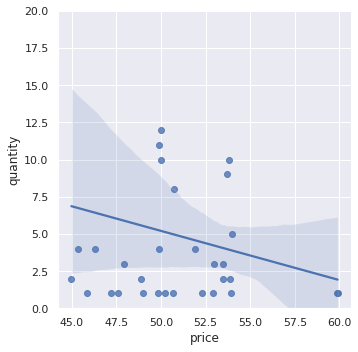

In [ ]:
# demand curve
g=sns.lmplot(x = "price", y = "quantity",
data = product_1_test)
g.set(ylim=(0,20))

Negative correlation

In [ ]:
#References: https://towardsdatascience.com/optimizing-product-price-using-regression-2c17688e65ea
# profiy
# # plugging regression coefficients
# quantity = 827.3454655 - 8.07479507 * price # eq (5)
# # the profit function in eq (3) becomes
# profit = (827.3454655 - 8.07479507 * price) * price - cost # eq (6)

**Demand function -->** Used to find connection between demand and price

**profit function -->** total revenue is based on units sold and price. For this project we are assuming the cost as 0

Therefore our revised profit formula:

profit = volume - cost * price

In [ ]:
model_demand = LinearRegression()


x = product_1_test['price'] 
x=x[:, None]

y = product_1_test['quantity']
y=y[:, None]

model_demand.fit(x, y)
slope=model_demand.coef_[0][0]
intercept=model_demand.intercept_[0]


In [ ]:
import random

price_ranges = []

for price_point in range(10):
    price_ranges.append(round(random.uniform(min_price-100,max_price+100),2))
price_ranges.sort()

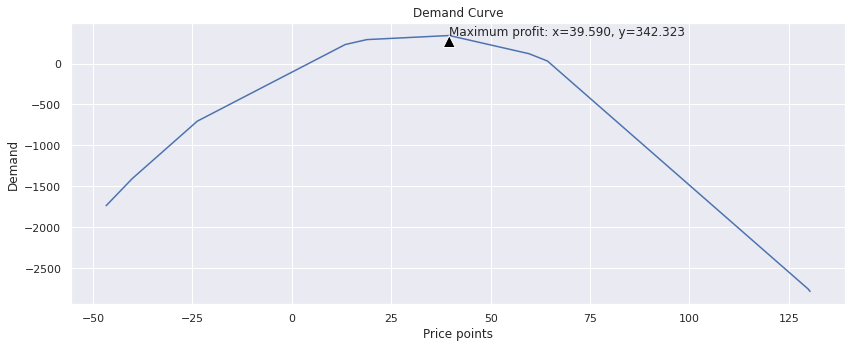

In [ ]:
Price = price_ranges
# assuming a fixed cost
cost = 0
Revenue = []
for i in Price:
   quantity_demanded = intercept + slope * i
   
   # profit function
   Revenue.append((i-cost) * quantity_demanded)
# create data frame of price and revenue
profit = pd.DataFrame({"Price": Price, "Revenue": Revenue})
#plot revenue against price
# plt.plot(profit["Price"], profit["Revenue"])

###$
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.array(profit['Price'])
y = np.array(profit['Revenue'])
line, = ax.plot(x, y)

xmax=x[np.argmax(y)]
ymax=y.max()
# xmax = x[xpos]
text= "Maximum profit: x={:.3f}, y={:.3f}".format(xmax,ymax)
ax.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax + 5), arrowprops=dict(facecolor='black'),)


plt.xlabel('Price points')
plt.ylabel('Demand')
plt.title('Demand Curve')
plt.grid(True)
  
plt.show()

From the demand curve, we can conclude that this sales margin oughts to increase if we reduce the price to $39.590 to be able to sell more than 300 units of this product. This is a staggering increase from 2018's mere 152 units sold. It is almost 45% increase in sales of this product

# Calculating margin percent if we set this new price

In [ ]:
revenue_in_2018 = revenue_of_product_2018['price'] * revenue_of_product_2018['units_sold']
revenue_predicted = xmax * ymax
margin_percent = (revenue_predicted - revenue_in_2018)/revenue_in_2018*100
margin_percent

year
2018    78.188228
dtype: float64

## Conclusion: If the demand increases by 45% then the revenue of this product will increase by almost 78%